# Load data  
In this notebook, we'll look at how to open the downloaded data, how the data is organised, and ways of visualising them.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#export
import sys
sys.path.append('../course-v3/nbs/dl2')
from exp.nb_12a import *

In [3]:
#export
import os, json, sys
from pathlib import Path
import numpy as np, pandas as pd
import PIL, geopandas as gpd, cv2
import shapely.wkt, shapely.geometry

import matplotlib.pyplot as plt

In [4]:
SOURCE = Path('data')
SOURCE_TRN = SOURCE/'train'

In [5]:
# export
Path.ls = lambda o: list(o.iterdir())

### Single image  

To keep things simple, let's look at a single image first.  This includes: 

1. image before disaster
2. image after disaster
3. labels before disaster
4. labels after disaster

In [6]:
# export
def pre_img_fpaths(ns): return [Path(n) for n in ns if '_pre_' in str(n) and n.suffix=='.png']

In [8]:
len((SOURCE_TRN/'images').ls()), len(pre_img_fpaths((SOURCE_TRN/'images').ls()))

(5598, 2799)

In [9]:
fn_pre = pre_img_fpaths((SOURCE_TRN/'images').ls())[16] # Make sure that this is a pre-disaster image's file name.
fn_pre

PosixPath('data/train/images/palu-tsunami_00000024_pre_disaster.png')

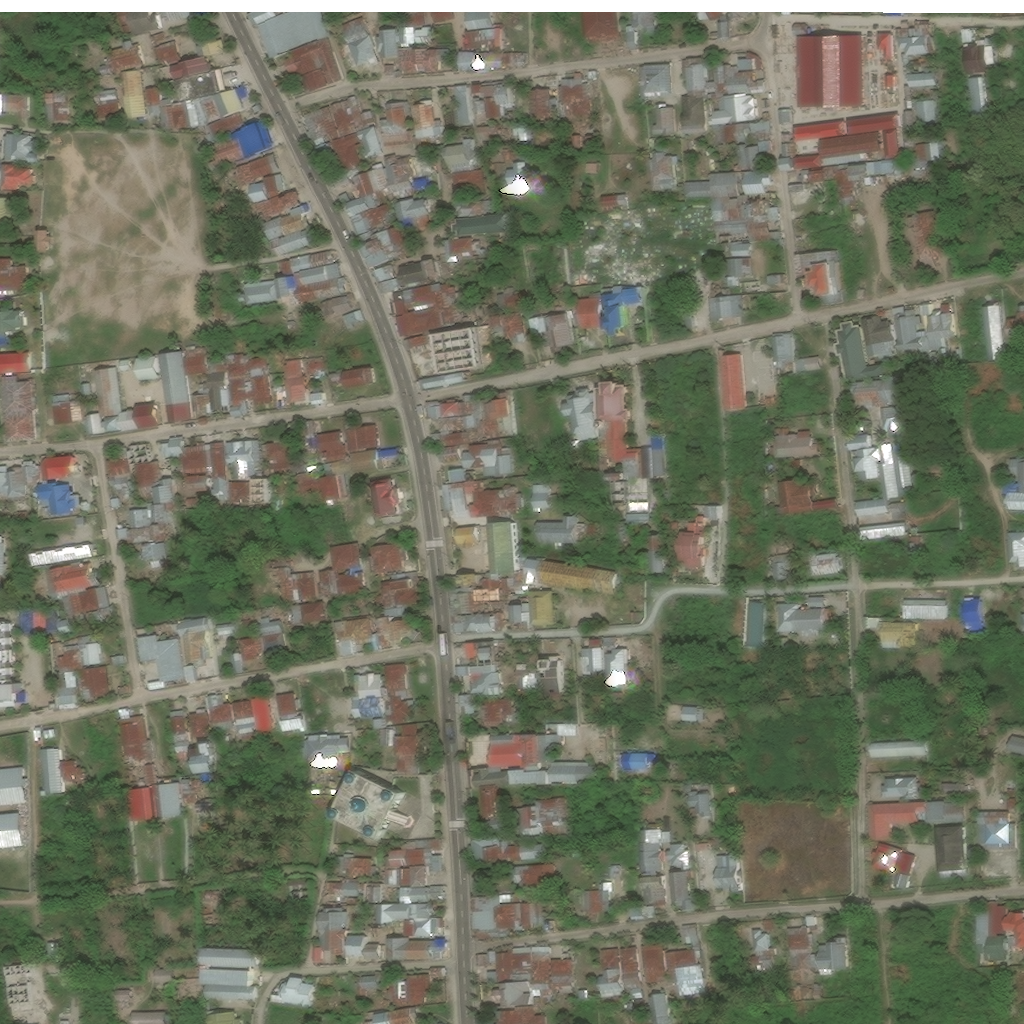

In [10]:
img = PIL.Image.open(fn_pre)
img

In [11]:
# export
def pre2post_fpath(o:Path): return Path(str(o).replace('_pre_', '_post_'))

In [12]:
fn_post = pre2post_fpath(fn_pre)
fn_post

PosixPath('data/train/images/palu-tsunami_00000024_post_disaster.png')

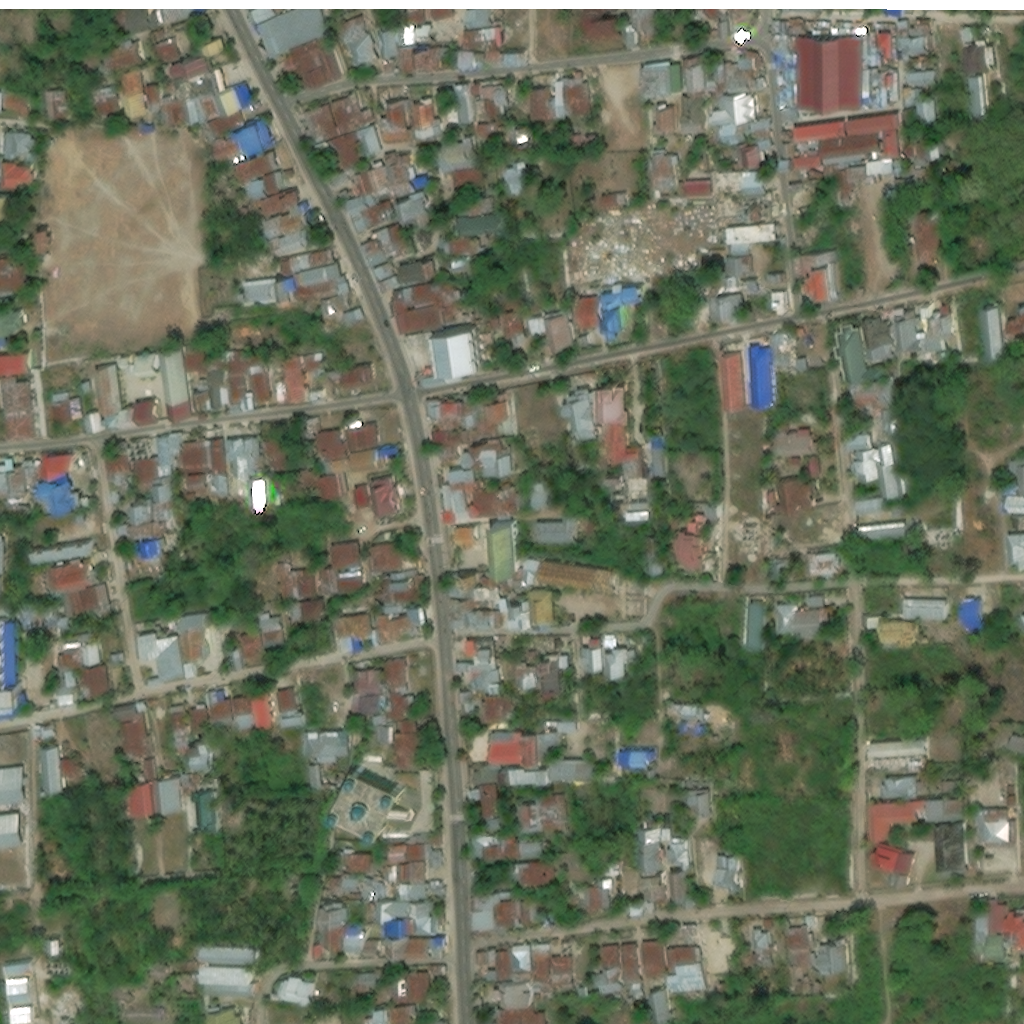

In [13]:
img_post = PIL.Image.open(fn_post)
img_post

Get the labels for the pre-disaster image.

In [14]:
# export
def img2label_fpath(o:Path): 
    return Path(str(o).replace('images/', 'labels/').replace('.png', '.json'))

In [15]:
ln_pre = img2label_fpath(fn_pre)
ln_pre

PosixPath('data/train/labels/palu-tsunami_00000024_pre_disaster.json')

In [16]:
label_pre = json.load(open(ln_pre))

In [17]:
label_pre['metadata']

{'sensor': 'GEOEYE01',
 'provider_asset_type': 'GEOEYE01',
 'gsd': 2.0312154,
 'capture_date': '2017-01-24T02:18:34.285Z',
 'off_nadir_angle': 26.653793,
 'pan_resolution': 0.5076194,
 'sun_azimuth': 125.73163,
 'sun_elevation': 56.402397,
 'target_azimuth': 281.76422,
 'disaster': 'palu-tsunami',
 'disaster_type': 'tsunami',
 'catalog_id': '1050010008066000',
 'original_width': 1024,
 'original_height': 1024,
 'width': 1024,
 'height': 1024,
 'id': 'MjUxNDY0MQ.HUd2o5aJEz9HXmHAPcjn3d7YnD8',
 'img_name': 'palu-tsunami_00000024_pre_disaster.png'}

Below, 177 is probably the number of buildings in the image, and `lng_lat` and `xy` are just two different coordinates for the points that mark out the buildings.

In [18]:
len(label_pre['features']['lng_lat']), len(label_pre['features']['xy'])

(474, 474)

To keep things simple again, pick the first building:

In [19]:
label_pre['features']['lng_lat'][0].keys()

dict_keys(['properties', 'wkt'])

In [20]:
label_pre['features']['lng_lat'][0]['properties']

{'feature_type': 'building', 'uid': 'c18d34cd-d48d-43ba-9d9c-011b6f9d5eb8'}

In [21]:
label_pre['features']['lng_lat'][0]['wkt']

'POLYGON ((119.877226662611 -0.7951672602926778, 119.8772262528753 -0.795167572472002, 119.8772382704961 -0.7951846504595536, 119.8772436499913 -0.7952822906693267, 119.8771393094482 -0.7952865668189486, 119.8771278980878 -0.7952153107767643, 119.8771501800304 -0.7951737527605364, 119.8771903006305 -0.7951749704990712, 119.8771894526726 -0.7951664943210469, 119.877226662611 -0.7951672602926778))'

In [22]:
label_pre['features']['xy'][0].keys()

dict_keys(['properties', 'wkt'])

In [23]:
label_pre['features']['xy'][0]['properties']

{'feature_type': 'building', 'uid': 'c18d34cd-d48d-43ba-9d9c-011b6f9d5eb8'}

In [24]:
label_pre['features']['xy'][0]['wkt']

'POLYGON ((1005.25 934.63, 1005.158348196293 934.6992687056425, 1007.842448188211 938.4940307631825, 1009.03 960.1799999999999, 985.7022178997572 961.1134265594505, 983.1620515683429 945.2862363406385, 988.15 936.0599999999999, 997.119460325962 936.3367065188321, 996.9311977982215 934.4540812414267, 1005.25 934.63))'

Get the post-disaster labels for this image.

In [25]:
ln_post = img2label_fpath(fn_post)
ln_post

PosixPath('data/train/labels/palu-tsunami_00000024_post_disaster.json')

In [26]:
label_post = json.load(open(ln_post))

In [27]:
label_post['metadata']

{'sensor': 'WORLDVIEW02',
 'provider_asset_type': 'WORLDVIEW02',
 'gsd': 2.8247435,
 'capture_date': '2018-10-01T02:26:02.000Z',
 'off_nadir_angle': 36.436947,
 'pan_resolution': 0.7035197,
 'sun_azimuth': 96.50162,
 'sun_elevation': 68.848434,
 'target_azimuth': 221.88036,
 'disaster': 'palu-tsunami',
 'disaster_type': 'tsunami',
 'catalog_id': '10300100841CB500',
 'original_width': 1024,
 'original_height': 1024,
 'width': 1024,
 'height': 1024,
 'id': 'MjU3ODI3OA.mCOnRhDO9_7Jt8D_9zsV3fdDpmE',
 'img_name': 'palu-tsunami_00000024_post_disaster.png'}

Notice that pre-disaster and post-disaster metadata are mostly different, but *disaster* and *disaster-type* are the same.  Here below, only the xy-coorindates will be looked at for the first building.

In [28]:
label_post['features']['xy'][0].keys()

dict_keys(['properties', 'wkt'])

In [29]:
label_post['features']['xy'][0]['properties']

{'feature_type': 'building',
 'subtype': 'no-damage',
 'uid': 'c18d34cd-d48d-43ba-9d9c-011b6f9d5eb8'}

Notice that for the same building in the same image, the `uid`s are the same pre-disaster and post-disaster.

Pre-disaster: '7ae792ae-64b5-41ec-be7b-14873c450650'.

In [30]:
label_post['features']['xy'][0]['wkt']

'POLYGON ((1005.249981247345 934.6299999080635, 1005.158329439784 934.6992686105004, 1007.842429435561 938.4940306712143, 1009.029981242797 960.1799999072896, 985.7021991480497 961.1134264665209, 983.1620328183565 945.2862362466117, 988.1499812469812 936.0599999078358, 997.1194415740591 936.3367064269942, 996.9311790435036 934.4540811466702, 1005.249981247345 934.6299999080635))'

Repeat above for the second building listed in this image.

In [31]:
label_pre['features']['xy'][0]['properties']

{'feature_type': 'building', 'uid': 'c18d34cd-d48d-43ba-9d9c-011b6f9d5eb8'}

In [32]:
label_post['features']['xy'][0]['properties']

{'feature_type': 'building',
 'subtype': 'no-damage',
 'uid': 'c18d34cd-d48d-43ba-9d9c-011b6f9d5eb8'}

In [33]:
label_pre['features']['xy'][0]['wkt']

'POLYGON ((1005.25 934.63, 1005.158348196293 934.6992687056425, 1007.842448188211 938.4940307631825, 1009.03 960.1799999999999, 985.7022178997572 961.1134265594505, 983.1620515683429 945.2862363406385, 988.15 936.0599999999999, 997.119460325962 936.3367065188321, 996.9311977982215 934.4540812414267, 1005.25 934.63))'

In [34]:
label_post['features']['xy'][0]['wkt']

'POLYGON ((1005.249981247345 934.6299999080635, 1005.158329439784 934.6992686105004, 1007.842429435561 938.4940306712143, 1009.029981242797 960.1799999072896, 985.7021991480497 961.1134264665209, 983.1620328183565 945.2862362466117, 988.1499812469812 936.0599999078358, 997.1194415740591 936.3367064269942, 996.9311790435036 934.4540811466702, 1005.249981247345 934.6299999080635))'

### Polygon

In the raw data, the area covered by a feature (like a building) is expressed in *well-known text representation ([wkt](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)*, which can be loaded using `shapely.wkt.loads`.

In [35]:
s = label_pre['features']['xy'][0]['wkt']
s

'POLYGON ((1005.25 934.63, 1005.158348196293 934.6992687056425, 1007.842448188211 938.4940307631825, 1009.03 960.1799999999999, 985.7022178997572 961.1134265594505, 983.1620515683429 945.2862363406385, 988.15 936.0599999999999, 997.119460325962 936.3367065188321, 996.9311977982215 934.4540812414267, 1005.25 934.63))'

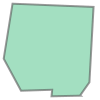

In [36]:
shapely.wkt.loads(s)

Gather all the features of the current image in a `geopandas.GeoDataFrame`.  Each row of this will correpond to a feature.  Each feature will have three bits of information: `uid`, `feature_type` and `wkt`.  

In [37]:
label_pre['features']['xy'][0]

{'properties': {'feature_type': 'building',
  'uid': 'c18d34cd-d48d-43ba-9d9c-011b6f9d5eb8'},
 'wkt': 'POLYGON ((1005.25 934.63, 1005.158348196293 934.6992687056425, 1007.842448188211 938.4940307631825, 1009.03 960.1799999999999, 985.7022178997572 961.1134265594505, 983.1620515683429 945.2862363406385, 988.15 936.0599999999999, 997.119460325962 936.3367065188321, 996.9311977982215 934.4540812414267, 1005.25 934.63))'}

In [38]:
label_pre['features']['xy'][1]

{'properties': {'feature_type': 'building',
  'uid': '4db83f7b-7c77-4cb4-8ea7-ad5a338a92b1'},
 'wkt': 'POLYGON ((1013.567983992795 937.9587129012542, 1014.768298039184 938.1987757105339, 1014.534387171473 945.8838938149787, 1009.045631662675 946.5842617345284, 1008.122098416177 935.820973108894, 1013.67 935.74, 1013.567983992795 937.9587129012542))'}

In [39]:
# export
def dict2srs_feature(o:dict):
    '''Convert a single feature's dict to series.'''
    d = dict()
    d.update(o['properties'])
    d.update({'wkt': o['wkt']})
    return pd.Series(d)

In [40]:
def features2df(fs:list):
    '''Convert all features' dict to series, return dataframe.'''
    df = pd.DataFrame()
    for f in fs: df = df.append(dict2srs_feature(f), ignore_index=True)
    return df

In [41]:
feat = label_pre['features']['xy'][1]
dict2srs_feature(feat)

feature_type                                             building
uid                          4db83f7b-7c77-4cb4-8ea7-ad5a338a92b1
wkt             POLYGON ((1013.567983992795 937.9587129012542,...
dtype: object

Here, each row in `df` represents a feature in the image.  For each feature, its type, id and wkt are available.

In [42]:
df = features2df(label_pre['features']['xy'])
df.head()

feature_type                                   uid  \
0     building  c18d34cd-d48d-43ba-9d9c-011b6f9d5eb8   
1     building  4db83f7b-7c77-4cb4-8ea7-ad5a338a92b1   
2     building  fc34426b-db11-403d-bdcf-1527b7d2508a   
3     building  052f9f14-e32e-484a-811d-cd0fac134493   
4     building  577576f3-3bdc-41ec-a571-6f6cf843cf3b   

                                                 wkt  
0  POLYGON ((1005.25 934.63, 1005.158348196293 93...  
1  POLYGON ((1013.567983992795 937.9587129012542,...  
2  POLYGON ((1024 912.9526689238836, 1024 960.552...  
3  POLYGON ((997.9098549655502 902.2102273359953,...  
4  POLYGON ((900.8648921308155 873.7983411645412,...

The `'wkt'` column is actually of type `str`.  Replace it with `shapely`'s polygon type. 

In [43]:
df['geometry'] = df.wkt.apply(shapely.wkt.loads)
df.drop('wkt', axis=1, inplace=True)
print(df.dtypes)
df.head()

feature_type    object
uid             object
geometry        object
dtype: object


feature_type                                   uid  \
0     building  c18d34cd-d48d-43ba-9d9c-011b6f9d5eb8   
1     building  4db83f7b-7c77-4cb4-8ea7-ad5a338a92b1   
2     building  fc34426b-db11-403d-bdcf-1527b7d2508a   
3     building  052f9f14-e32e-484a-811d-cd0fac134493   
4     building  577576f3-3bdc-41ec-a571-6f6cf843cf3b   

                                            geometry  
0  POLYGON ((1005.25 934.63, 1005.158348196293 93...  
1  POLYGON ((1013.567983992795 937.9587129012542,...  
2  POLYGON ((1024 912.9526689238836, 1024 960.552...  
3  POLYGON ((997.9098549655502 902.2102273359953,...  
4  POLYGON ((900.8648921308155 873.7983411645412,...

In [44]:
# export 
def features2df(fs:list):
    '''Convert all features' dict to series, return dataframe.'''
    assert len(fs) > 0
    df = pd.DataFrame()
    for f in fs: df = df.append(dict2srs_feature(f), ignore_index=True)
    df['geometry'] = df.wkt.apply(shapely.wkt.loads)
    df.drop('wkt', axis=1, inplace=True)
    return df

By casting the above `pandas.DataFrame` object as a `geopandas.GeoDataFrame` object, the `descartes` package can plot all the features off it in one go.  Although, the plots appears to be upside down to the original image.  Not sure why at the moment.

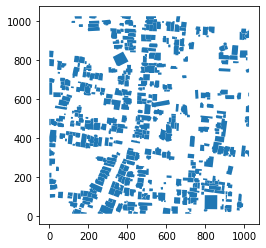

In [45]:
gdf = gpd.GeoDataFrame(df)
gdf.plot();

### Convert polygon to mask

Grab the wkt of a polygon.

In [46]:
poly_wkt = label_pre['features']['xy'][0]['wkt']
poly_wkt

'POLYGON ((1005.25 934.63, 1005.158348196293 934.6992687056425, 1007.842448188211 938.4940307631825, 1009.03 960.1799999999999, 985.7022178997572 961.1134265594505, 983.1620515683429 945.2862363406385, 988.15 936.0599999999999, 997.119460325962 936.3367065188321, 996.9311977982215 934.4540812414267, 1005.25 934.63))'

Load the wkt into a `shapely.geometry.polygon.Polygon` object. Note that this is also displayed upside down to the original image.

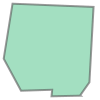

In [47]:
poly = shapely.wkt.loads(poly_wkt)
poly

Use `shapely.geometry.mapping` to extract the coordinates of the points that form the polygon.  A `dict` object is returned.

In [48]:
poly_mapped = shapely.geometry.mapping(poly)
poly_mapped

{'type': 'Polygon',
 'coordinates': (((1005.25, 934.63),
   (1005.158348196293, 934.6992687056425),
   (1007.842448188211, 938.4940307631825),
   (1009.03, 960.18),
   (985.7022178997572, 961.1134265594505),
   (983.1620515683429, 945.2862363406385),
   (988.15, 936.06),
   (997.119460325962, 936.3367065188321),
   (996.9311977982215, 934.4540812414267),
   (1005.25, 934.63)),)}

Cast the coordinates into a numpy array of dtype `np.int32` and of shape `(number of polygons, number of points in polygon, number of spatial dimensions)`.  `number of spatial dimensions` is 2 here, for x and y.  Note this assumes that every polygon has the same number of points in it, which is almost never the case, but here there is only one polygon, so it's ok.

In [49]:
poly_na = np.array(poly_mapped['coordinates'], dtype=np.int32)
poly_na

array([[[1005,  934],
        [1005,  934],
        [1007,  938],
        [1009,  960],
        [ 985,  961],
        [ 983,  945],
        [ 988,  936],
        [ 997,  936],
        [ 996,  934],
        [1005,  934]]], dtype=int32)

Using the coordinates of the points of the polygons, and the image size, a mask containing the polygons can be created using `cv2.fillPoly`.

In [50]:
img.size

(1024, 1024)

In [51]:
img_blank = np.zeros((1024, 1024, 3), dtype=np.uint8)

In [52]:
poly_mask = cv2.fillPoly(img_blank, poly_na, (1, 1, 1))
poly_mask.shape, poly_mask.sum()

((1024, 1024, 3), 1920)

Check that `poly_mask` is a binary mask.  That is, it only contains either 0 or 1 in its values. 1 for there exists feature (like a building), 0 for there exists *no* feature.

In [53]:
np.unique(poly_mask)

array([0, 1], dtype=uint8)

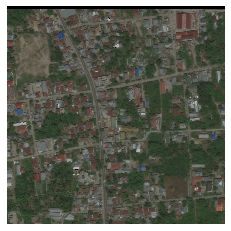

In [54]:
plt.imshow(img);
plt.imshow(np.array([255, 50, 1]) * poly_mask, alpha=.3)
plt.axis('off');

### Multiple polygons to mask

Each polygon represents a feature.  Most of the time there is more than one feature in an image.  The polygons of these features need to go on the same mask.

Above we have already gathered all features into a `pandas.DataFrame` object, where the `geometry` column contains the `shapely.geometry.polygon.Polygon` object for each feature.

In [55]:
df.head()

feature_type                                   uid  \
0     building  c18d34cd-d48d-43ba-9d9c-011b6f9d5eb8   
1     building  4db83f7b-7c77-4cb4-8ea7-ad5a338a92b1   
2     building  fc34426b-db11-403d-bdcf-1527b7d2508a   
3     building  052f9f14-e32e-484a-811d-cd0fac134493   
4     building  577576f3-3bdc-41ec-a571-6f6cf843cf3b   

                                            geometry  
0  POLYGON ((1005.250 934.630, 1005.158 934.699, ...  
1  POLYGON ((1013.568 937.959, 1014.768 938.199, ...  
2  POLYGON ((1024.000 912.953, 1024.000 960.552, ...  
3  POLYGON ((997.910 902.210, 997.910 905.578, 10...  
4  POLYGON ((900.865 873.798, 910.220 875.720, 90...

Iterate through the rows, getting the coordinates of the points of each polygon.  Then, put them in a `np.array`.  `poly_nas`'s length is the number of features/polygons.  Each element in it is a `np.array` object that contains the $x_1$ and $x_0$  coorindates of the points of a polygon.  For example, `poly_nas[2][0,1]` is the $x_0$-coorindate of the first point of the third feature.

In [56]:
poly_nas = []
for _, r in df.iterrows():
    poly = r.geometry
    poly_mapped = shapely.geometry.mapping(poly)
    poly_na = np.array(poly_mapped['coordinates'][0], dtype=np.int32)
    poly_nas.append(poly_na)
    
poly_nas = np.array(poly_nas)

In [57]:
poly_nas[2]

array([[1024,  912],
       [1024,  960],
       [1022,  950],
       [1014,  948],
       [1015,  937],
       [1014,  937],
       [1014,  932],
       [1005,  930],
       [1005,  930],
       [1000,  922],
       [1006,  915],
       [1009,  910],
       [1024,  912]], dtype=int32)

Because `img_blank` is a `1024 x 1024 x 3` array, it's essentially an image with 3 channels, normally interpreted as the RGB channels.  The tuple `(1, 1, 1)` are the mask values to be used for these 3 channels.  The output array is therefore such that whenever there is a feature, all three channels will have a value of 1, or if interpreting them as RGB values, whenever there is a feature, the pixel is close to completely black in colour.  

In [58]:
polys_mask = cv2.fillPoly(img_blank, poly_nas, (1, 1, 1))

Check that it is a binary mask.  Note that if it isn't, then it measn that some of the features' polygons overlap.

In [59]:
np.unique(polys_mask), polys_mask.shape

(array([0, 1], dtype=uint8), (1024, 1024, 3))

`np.array([255, 50, 0])` is used to scale the values of the 3 channels in `poly_mask` such that the colour, wherever there is a feature, is reddish.

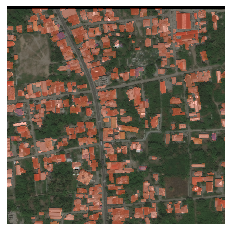

In [60]:
plt.imshow(img)
plt.imshow(np.array([255, 50, 0]) * polys_mask, alpha=.3)
plt.axis('off');

`polys_mask` can be forced to be a binary mask by setting all the overlapped pixels to 0.

In [61]:
polys_mask[polys_mask > 1] = 0

There are more sophisticated ways of dealing with overlapping polygons, such as shrinking all polygons towards their centre by a little, as this decreases the chance of overlaps. See the xview2's benchmark for more details.

Gather things in this section in a function.

In [62]:
def polys2mask(ps:list, sz=(1024, 1024)):
    '''Convert a list of shapely polygons to a binary mask. '''
    ps = [shapely.geometry.mapping(p) for p in ps]
    ps = [np.array(p['coordinates'][0], dtype=np.int32) for p in ps]
    ps = np.array(ps)
    
    sz = list(sz) + [3]
    img0 = np.zeros(sz, dtype=np.uint8)
    mask = cv2.fillPoly(img0, ps, (1, 1, 1))
    mask[mask > 1] = 0
    return mask

In [63]:
polys = [r.geometry for _, r in df.iterrows()]
polys_mask = polys2mask(polys)

Check that the mask returned plots to something that looks the same.

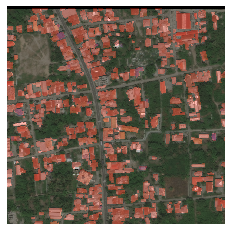

In [64]:
plt.axis('off')
plt.imshow(img)
plt.imshow(np.array([255, 30, 0]) * polys_mask, alpha=.3);

### Saving mask to disk

`plt.imsave` and `PIL.Image.Image.save` both can 'save' an array.  There are also two ways to read an image file, like `.png`: `plt.imread` and `PIL.Image.open`. How are different combinations of these different?

`poly_mask` obtained above is a rank-3 `np.array` object, with either 0 or 1 as values.  Try different combinations of saving and reading on this.

It appears that, when you save it with `plt.imsave`, a fourth channel is added to what was originally an array with 3 channels.  So, the 3rd rank is now of length 4.  When you open with `PIL.Image.open` followed by `np.array`, you get the original `dtype` as well as the values in the original 3 channels, just that now there is an additional 4th channel with all values at 255.  When you open with `plt.imread`, the original values have been scaled by 1/255, with all values in the 4th channel at 1; the `dtype` is now `np.float32`.

In [65]:
plt.imsave('mask_rank3_uint8_na.png', poly_mask)

In [66]:
np.array(PIL.Image.open('mask_rank3_uint8_na.png'))

array([[[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0

In [67]:
plt.imread('mask_rank3_uint8_na.png')

array([[[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       ...,

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 

After saving the same rank-3 array using `PIL.Image.Image.save`, if you load using `PIL.Image.open` followed by `np.array`, you get back the same thing!  If you load using `plt.imread`, you get back an array of the same shape, but with everything scaled by 1/255, and so `dtype` becomes `np.float32`.

In [68]:
PIL.Image.fromarray(poly_mask).save('mask_rank3_uint8_na_pil.png')

In [69]:
np.array(PIL.Image.open('mask_rank3_uint8_na_pil.png'))

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
      

In [70]:
plt.imread('mask_rank3_uint8_na_pil.png') * 255

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0

Let's now try saving and loading a 2d mask.  Start by creating a 2d mask from the same list of polygons.

In [71]:
img_blank = np.zeros((1024, 1024), dtype=np.uint8)

In [72]:
polys_mask = cv2.fillPoly(img_blank, poly_nas, (1, ))

In [73]:
np.unique(polys_mask), polys_mask.shape

(array([0, 1], dtype=uint8), (1024, 1024))

Now the mask is 2d, it has just 1 channel, so is essentially a gray-scale image.  The colour with which it appears when plotted is determined by the colour map used by `plt.imshow`, whose default colour map renders our mask yellowish.  To control the colour by explicitly scaling the RGB channels like above, `polys_mask` needs to be expanded to have 3 channels, and the RGB colours needs to be multiplied to the resulting array.

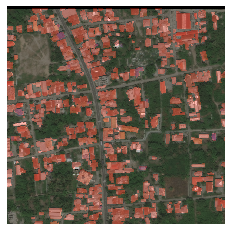

In [74]:
plt.axis('off')
plt.imshow(img)
plt.imshow(np.array([255, 30, 0]) * polys_mask[..., None], alpha=0.3);

Save using `plt.imsave`.

In [75]:
plt.imsave('mask_rank2_uint8_na.png', polys_mask)

In [76]:
np.array(PIL.Image.open('mask_rank2_uint8_na.png')).shape

(1024, 1024, 4)

In [77]:
np.array(PIL.Image.open('mask_rank2_uint8_na.png'))

array([[[ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        ...,
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255]],

       [[ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        ...,
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255]],

       [[ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        ...,
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255]],

       [[ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        ...,
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68,   1,  84, 255],
        [ 68

In [78]:
plt.imread('mask_rank2_uint8_na.png').shape

(1024, 1024, 4)

In [79]:
plt.imread('mask_rank2_uint8_na.png') * 255

array([[[ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        ...,
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.]],

       [[ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        ...,
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.]],

       [[ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        ...,
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.]],

       [[ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
        [ 68.,   1.,  84., 255.],
   

Save using `PIL.Image.Image.save`. If you load the saved file with `PIL.Image.open` followed by `np.array`, you get back the same thing, `polys_mask`.  If you load with `plt.imread`, you get back something with the same shape but scaled by 1/255.

In [80]:
PIL.Image.fromarray(polys_mask).save('mask_rank2_uint8_na_pil.png')

In [81]:
np.allclose(np.array(PIL.Image.open('mask_rank2_uint8_na_pil.png')), polys_mask)

True

In [82]:
plt.imread('mask_rank2_uint8_na_pil.png')

array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.],
       [0., 0., 0., 0., ..., 0., 0., 0., 0.]], dtype=float32)

In the current context, the mask is for identifying whether a pixel belongs to a feature or not, it is sufficiently described by a 2d array.  Therefore, it will be saved and loaded as a 2d array.  For example, if `polys_mask` is 2d binary mask that is to be saved to a file called `mask.png`, then:

* Save it using `PIL.Image.fromarray(polys_mask).save('mask.png')`.
* Load it from file with `np.array(PIL.Image.open('mask.png'))`.

So, change `polys2mask` to return a 2d array instead.

In [83]:
# export
def polys2mask(ps:list, sz=(1024, 1024)):
    '''Convert a list of shapely polygons to a binary mask. '''
    ps = [shapely.geometry.mapping(p) for p in ps]
    ps = [np.array(p['coordinates'][0], dtype=np.int32) for p in ps]
    ps = np.array(ps)
    
    img0 = np.zeros(sz, dtype=np.uint8)
    mask = cv2.fillPoly(img0, ps, (1,))
    mask[mask > 1] = 0
    return mask

(1024, 1024)


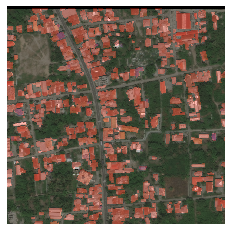

In [84]:
polys = [r.geometry for _, r in df.iterrows()]
m = polys2mask(polys)

print(m.shape)
plt.axis('off')
plt.imshow(img)
plt.imshow(np.array([255, 30, 0]) * m[...,None], alpha=.3);

In [85]:
# export
def save_mask(m, fn): PIL.Image.fromarray(m).save(fn)
def load_mask(fn): return np.array(PIL.Image.open(fn))

In [86]:
save_mask(m, 'testsave_bigfactory.png')

In [87]:
m_loaded = load_mask('testsave_bigfactory.png')
np.allclose(m, m_loaded)

True

### Produce feature binary mask for all samples

For each sample in the training set, load the pre-disaster feature polygons, generate a binary mask from them, save the mask to disk.  These masks indicate where there is a feature in the image, and they can be used as the targets in the 'localization' part of this competition.

In [88]:
SOURCE.ls()

[PosixPath('data/train'), PosixPath('data/train.tar.gz')]

In [90]:
(SOURCE/'train').ls()

[PosixPath('data/train/labels'), PosixPath('data/train/images')]

In [91]:
fn_pre

PosixPath('data/train/images/palu-tsunami_00000024_pre_disaster.png')

In [92]:
ln_pre

PosixPath('data/train/labels/palu-tsunami_00000024_pre_disaster.json')

In [93]:
Path('data/train/train/binarymasks/hurricane-michael_00000183_pre_disaster.png')

PosixPath('data/train/train/binarymasks/hurricane-michael_00000183_pre_disaster.png')

* Get path for a pre-disaster image.
* Get the path for the corresponding label .json file.
* Get all the polygons from .json file.
* Convert polygons to mask
* Save mask to disk
* Repeat for all pre-disaster images.

Save the masks at `data/train/train/binarymasks/`.

Use the very fast function for finding files from fastai:

In [325]:
get_files??

In [96]:
fnames = get_files(SOURCE/'train'/'images', extensions=['.png',])
fnames = pre_img_fpaths(fnames)
fnames[:5], len(fnames)

([PosixPath('data/train/images/socal-fire_00001272_pre_disaster.png'),
  PosixPath('data/train/images/mexico-earthquake_00000125_pre_disaster.png'),
  PosixPath('data/train/images/socal-fire_00000301_pre_disaster.png'),
  PosixPath('data/train/images/socal-fire_00000484_pre_disaster.png'),
  PosixPath('data/train/images/hurricane-michael_00000145_pre_disaster.png')],
 2799)

In [97]:
#export
def feats2polys(xs:list):
    ''' Transform list of feature dicts, if any, to list of polygons. '''
    if xs: return list(features2df(xs).geometry)
    return []

In [98]:
#export
def img2mask(o:Path):
    ''' Transform image path to binary mask. '''
    lname = img2label_fpath(o)
    feats = json.load(open(lname))['features']['xy']
    polys = feats2polys(feats)
    return polys2mask(polys)

In [99]:
#export
def img2bmask_fpath(n): return Path(str(n).replace('images/', 'binarymasks/'))

In [103]:
os.makedirs('data/train/binarymasks', exist_ok=True)

In [104]:
#export
def generate_pre_binarymasks(fnames):
    for n in fnames: 
        mask, fpath = img2mask(n), img2bmask_fpath(n)
        PIL.Image.fromarray(mask).save(fpath)

**Run this cell below to generate the binary mask for all pre-disaster images in the training set.**

In [105]:
%%time
generate_pre_binarymasks(fnames)

CPU times: user 4min 57s, sys: 868 ms, total: 4min 57s
Wall time: 4min 56s


2799 masks


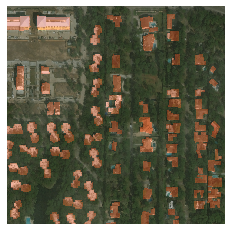

In [106]:
mnames = Path('data/train/binarymasks/').ls()
print(f'{len(mnames)} masks')

img = np.array(PIL.Image.open(fnames[1122]))
m = np.array(PIL.Image.open(mnames[1122]))
plt.axis('off')
plt.imshow(img)
plt.imshow(np.array([255, 50, 0]) * m[...,None], alpha=.3);

### Make ImageList

Make an `ImageList` object. This type is defined in fastai (Part2 2019) already but will be explicitly defined here again, as a refresher.

In [107]:
# export 
def compose(x, funcs, *args, order_key='_order', **kwargs):
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key): x = f(x, **kwargs)
    return x

In [108]:
# export
class ItemList(ListContainer):
    def __init__(self, items, path='.', tfms=None):
        super().__init__(items)
        self.path, self.tfms = Path(path), tfms
        
    def __repr__(self): return f'{super().__repr__()}\nPath: {self.path}'
    def new(self, items, cls=None):
        if cls is None: cls = self.__class__
        return cls(items, self.path, tfms=self.tfms)
        
    def get(self, i): return i
    def _get(self, i): return compose(self.get(i), self.tfms)
    def __getitem__(self, idx):
        res = super().__getitem__(idx)
        if isinstance(res, list): return [self._get(o) for o in res]
        return self._get(res)

In [109]:
# export
class ImageList(ItemList):
    @classmethod
    def from_files(cls, path, extensions=None, recurse=True, include=None, **kwargs):
        if extensions is None: extensions = image_extensions
        return cls(get_files(path, extensions, recurse=recurse, include=include), path, **kwargs)
    
    def get(self, fn): return PIL.Image.open(fn)

In [110]:
#export
class Transform(): _order = 0
class MakeRGB(Transform):
    def __call__(self, o): return o.convert('RGB')
def make_rgb(o): return o.convert('RGB')

In [112]:
il = ImageList(fnames, path=Path('data/train/images/'), tfms=MakeRGB())
il

ImageList (2799 items)
[PosixPath('data/train/images/socal-fire_00001272_pre_disaster.png'), PosixPath('data/train/images/mexico-earthquake_00000125_pre_disaster.png'), PosixPath('data/train/images/socal-fire_00000301_pre_disaster.png'), PosixPath('data/train/images/socal-fire_00000484_pre_disaster.png'), PosixPath('data/train/images/hurricane-michael_00000145_pre_disaster.png'), PosixPath('data/train/images/socal-fire_00001396_pre_disaster.png'), PosixPath('data/train/images/socal-fire_00000197_pre_disaster.png'), PosixPath('data/train/images/hurricane-florence_00000045_pre_disaster.png'), PosixPath('data/train/images/hurricane-michael_00000199_pre_disaster.png'), PosixPath('data/train/images/hurricane-harvey_00000080_pre_disaster.png')...]
Path: data/train/images

In [113]:
type(il[270])

PIL.Image.Image

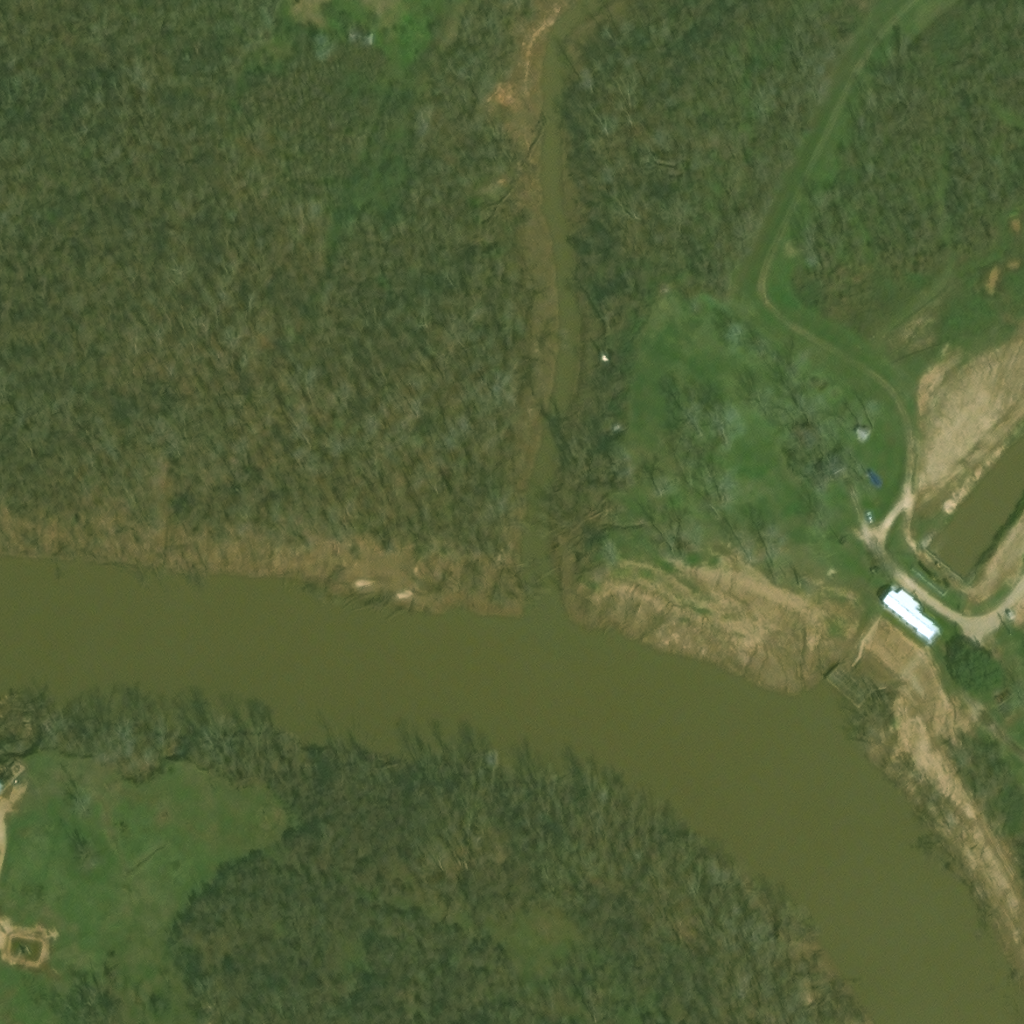

In [114]:
il[270]

### Split validation set

The downloaded dataset does not have a validation set, so need to take part of the training set to be it.

In [115]:
#export
class RandomSplitter(Transform):
    def __init__(self, val_pct=.1): self.val_pct = val_pct
    def __call__(self, il):
        n = len(il)
        idxs = np.random.permutation(n)
        cut = int(self.val_pct * n)
        items = ItemList(il.items)
        return il.new(items[idxs[:cut]]), il.new(items[idxs[cut:]])

In [116]:
valid, train = RandomSplitter()(il)

In [117]:
len(il), len(valid), len(train)

(2799, 279, 2520)

In [118]:
#export
class SplitData():
    def __init__(self, train, valid):
        self.train, self.valid = train, valid
    def __getattr__(self, k): return getattr(self.train, k)
    def __setstate__(self, data:Any): self.__dict__.update(data)
    @classmethod
    def split_by_func(cls, il, f):
        lists = map(il.new, split_by_func(il.items, f))
        return cls(*lists)
    @classmethod
    def split_by_random(cls, il, val_pct=.1):
        valid, train = RandomSplitter(val_pct)(il)
        return cls(train, valid)
    def __repr__(self): 
        return f'{self.__class__.__name__}\nTrain: {self.train}\nValid: {self.valid}\n'

In [119]:
sd = SplitData.split_by_random(il, val_pct=.1)

In [120]:
len(sd.valid), len(sd.train), len(il)

(279, 2520, 2799)

In [121]:
type(il), type(sd), type(sd.train), type(sd.valid)

(__main__.ImageList,
 __main__.SplitData,
 __main__.ImageList,
 __main__.ImageList)

In [122]:
type(sd.train[0]), type(sd.valid[0])

(PIL.Image.Image, PIL.Image.Image)

### Labeling

For each input image, the target, or label, is the binary mask obtained above that indicates where the features (or buildings) are.  So, create a type that will transforms the elements in `il` to the masks (or the masks' file paths).

In [123]:
#export
def _label_by_func(il, f, listtype=ItemList, tfms=None, **kwargs):
    return listtype([f(o) for o in il.items], path=il.path, tfms=tfms, **kwargs)
    
class LabeledData():
    def __init__(self, x, y): self.x, self.y = x, y
    def __getitem__(self, i): return self.x[i], self.y[i]
    def __len__(self): return len(self.x)
    @classmethod
    def label_by_func(cls, il, f, **kwargs):
        return cls(il, _label_by_func(il, f, **kwargs)) 
    def __repr__(self): return f'{self.__class__.__name__}\nx: {self.x}\ny: {self.y}\n'

In [124]:
#export
def label_by_func(sd, f, **kwargs):
    train = LabeledData.label_by_func(sd.train, f, **kwargs)
    valid = LabeledData.label_by_func(sd.valid, f, **kwargs)
    return SplitData(train, valid)

In [125]:
ll = label_by_func(sd, img2bmask_fpath, listtype=ImageList)

In [126]:
type(ll.train), type(sd.train)

(__main__.LabeledData, __main__.ImageList)

In [127]:
type(ll.train.x), type(ll.train.y)

(__main__.ImageList, __main__.ImageList)

In [128]:
type(ll.train.x[0]), type(ll.train.y[0])

(PIL.Image.Image, PIL.PngImagePlugin.PngImageFile)

### Transform to tensor

The following cells show the steps it takes to transform a `PIL.Image.Image` object to a `torch.tensor` object.

In [129]:
ll.train[9][0].size, ll.train[9][1].size

((1024, 1024), (1024, 1024))

In [130]:
type(ll.train[9][0]), type(ll.train[9][1])

(PIL.Image.Image, PIL.PngImagePlugin.PngImageFile)

Take the image first

In [131]:
img = ll.train[9][0]

Display 3 bytes.  The number of bytes, or the length of this byte buffer, is equal to the number of pixels in the image, times 3.

In [132]:
img.tobytes()[:3]

b'MVD'

A `torch.ByteStorage` object is like a flattened array, like a 1d tensor.  Notice that it already has a data type of `torch.uint8`.

In [133]:
byte_storage = torch.ByteStorage.from_buffer(img.tobytes())
byte_storage[:3], byte_storage.dtype

( 77
  86
  68
 [torch.ByteStorage of size 3], torch.uint8)

`torch.ByteTensor` is a proper `torch` tensor object.  It has the same data type as the byte storage.

In [134]:
byte_tensor = torch.ByteTensor(byte_storage)
byte_tensor

tensor([77, 86, 68,  ..., 43, 48, 38], dtype=torch.uint8)

Below shows how the pixels and channels are packed in the tensor.

In [135]:
w, h = img.size
byte_tensor.reshape(h, w, -1)

tensor([[[ 77,  86,  68],
         [ 72,  82,  63],
         [ 63,  71,  54],
         ...,
         [ 82,  87,  77],
         [ 91,  97,  87],
         [ 80,  86,  76]],

        [[ 76,  84,  67],
         [ 69,  77,  61],
         [ 62,  70,  54],
         ...,
         [ 72,  78,  68],
         [ 92, 100,  90],
         [ 83,  90,  80]],

        [[ 62,  69,  54],
         [ 65,  72,  57],
         [ 68,  76,  60],
         ...,
         [ 72,  78,  68],
         [ 92, 100,  90],
         [ 83,  90,  80]],

        ...,

        [[ 96,  90,  74],
         [112, 104,  87],
         [104,  96,  80],
         ...,
         [ 43,  50,  42],
         [ 45,  53,  44],
         [ 48,  56,  46]],

        [[ 99,  92,  75],
         [110, 101,  84],
         [107,  98,  82],
         ...,
         [ 44,  50,  40],
         [ 47,  54,  44],
         [ 47,  53,  44]],

        [[ 86,  80,  65],
         [103,  94,  77],
         [112, 102,  84],
         ...,
         [ 51,  57,  46],
        

Note that `torch.tensor(np.array(img))` produces the same, but was not used, probably because the rule was no `numpy` (in fastai part2 2019).

In [136]:
(torch.tensor(np.array(img)) - byte_tensor.reshape(h, w, -1)).sum()

tensor(0)

In [137]:
#export
def to_byte_tensor(o):
    res = torch.ByteTensor(torch.ByteStorage.from_buffer(o.tobytes()))
    w, h = o.size
    return res.view(h, w, -1).permute(2, 0, 1)
to_byte_tensor._order = 20

`ByteTensor` objects are arrays of integers (its dtype being `torch.uint8`).  This needs to be transformed to floats to work in a model.

In [138]:
#export
def to_float_tensor(o): return o.float()
to_float_tensor._order = 30

Note that the mask still has just one channel.

In [139]:
to_float_tensor(to_byte_tensor(ll.train.y[1])).shape

torch.Size([1, 1024, 1024])

Note that applying `convert('RGB')` on an opened `.png` already with 3 channels has no effect, as the resulting array is the same:

In [140]:
np.allclose(np.array(PIL.Image.open(ll.train.x.items[9]).convert('RGB')), np.array(PIL.Image.open(ll.train.x.items[9])))

True

In [141]:
PIL.Image.open(il.items[18]).tobytes() == PIL.Image.open(il.items[18]).convert('RGB').tobytes()

True

But on a binary mask that has 1 channel, `.convert('RGB')` returns something with 3 channels, duplicating the original channel three times.  If we want our binary masks to stay having just 1 channel in the pipeline, then leaving out `.convert('RGB')` will probably work.

In [142]:
np.allclose(np.array(PIL.Image.open(ll.train.y.items[9]).convert('L')), np.array(PIL.Image.open(ll.train.y.items[9]))[...,None])

False

In [143]:
PIL.Image.open(ll.train.y.items[13]).tobytes() == PIL.Image.open(ll.train.y.items[13]).convert('RGB').tobytes()

False

In [144]:
il = ImageList(fnames, path=Path('data/train/train/images/'))
sd = SplitData.split_by_random(il, val_pct=.1)
ll = label_by_func(sd, img2bmask_fpath, listtype=ImageList)

`plt.imshow` is handles input of different dtypes different.  To keep things simple, will try to give it `[0..1] for floats`.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 1024, 1024]) torch.Size([1, 1024, 1024])


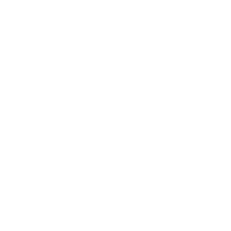

In [145]:
img = to_float_tensor(to_byte_tensor(ll.train.x[18]))
mask = to_float_tensor(to_byte_tensor(ll.train.y[18]))
print(img.shape, mask.shape)

plt.axis('off')
plt.imshow(img.permute(1, 2, 0));
#plt.imshow(mask.new([255, 20, 0]) * mask.permute(1, 2, 0), alpha=.3);

### Normalize

In [146]:
#export
class Normalize():
    _order = 40
    def __init__(self, factor): self.factor = factor
    def __call__(self, o): return self.factor * o

torch.Size([3, 1024, 1024]) torch.Size([1, 1024, 1024])


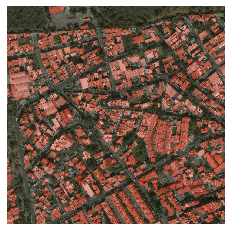

In [147]:
img = Normalize(1/255)(to_float_tensor(to_byte_tensor(ll.train.x[18])))
mask = to_float_tensor(to_byte_tensor(ll.train.y[18]))
print(img.shape, mask.shape)

plt.axis('off')
plt.imshow(img.permute(1, 2, 0));
plt.imshow(mask.new([255, 20, 0.]) / 255 * mask.permute(1, 2, 0), alpha=.3);

### Resize transform

The following is a transform for resizing the images and masks before they are passed to the model.  Use if needed.  

Resizing of an image or mask is done in PIL primarily using the `PIL.Image.Image.resize` method.  Its keyword parameter `resample` specifies how the pixels are to be 'averaged' to the new pixels in the resized image.  For an image, use `PIL.Image.BILINEAR`, for a mask, `PIL.Image.NEAREST`.

In [148]:
#export
class ResizeFixed(Transform):
    _order = 10
    def __init__(self, size, resample=0):
        if isinstance(size, int): size = (size, size)
        self.size, self.resample = size, resample
        
    def __call__(self, o): 
        return o.resize(self.size, self.resample)

torch.Size([3, 256, 256])
torch.Size([1, 256, 256])


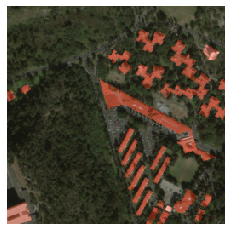

In [149]:
img_small = ResizeFixed(256, PIL.Image.BILINEAR)(ll.train.x[19])
mask_small = ResizeFixed(256, PIL.Image.NEAREST)(ll.train.y[19])

tfms = [to_byte_tensor, to_float_tensor]
img_small = Normalize(1/255)(compose(img_small, tfms))
mask_small = compose(mask_small, tfms)

print(img_small.shape), print(mask_small.shape)

plt.axis('off')
plt.imshow(img_small.permute(1, 2, 0))
plt.imshow(mask.new([255, 30, 0.]) / 255 * mask_small.permute(1, 2, 0), alpha=.3);

String together all these transforms in a list and pass it as the `tfms` parameter when constructing the image list and the mask list.

In [150]:
sz = 512

xtfms = [ResizeFixed(sz, resample=PIL.Image.BILINEAR), to_byte_tensor, to_float_tensor, Normalize(1/255)]
il = ImageList(fnames, path=Path('data/train/train/images/'), tfms=xtfms)

sd = SplitData.split_by_random(il, val_pct=.1)

ytfms = [ResizeFixed(sz, resample=PIL.Image.NEAREST), to_byte_tensor, to_float_tensor]
ll = label_by_func(sd, img2bmask_fpath, listtype=ImageList, tfms=ytfms)

torch.Size([3, 512, 512])
torch.Size([1, 512, 512])


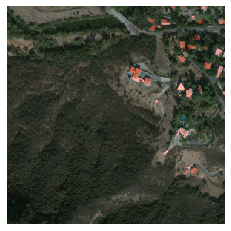

In [151]:
img_small = ll.train.x[567]
mask_small = ll.train.y[567]

print(img_small.shape), print(mask_small.shape)
plt.axis('off')
plt.imshow(img_small.permute(1, 2, 0))
mask_color = mask_small.new([255, 30, 0]) / 255
plt.imshow(mask_color * mask_small.permute(1, 2, 0), alpha=.3);

### Plotting mask over image

There is been a lot of plotting the binary mask over the image, so create a function for doing this.  

In [152]:
#export
def show_sample(img, mas=None, figsize=(4, 4), mas_color=None):
    _, ax = plt.subplots(figsize=figsize)
    ax.axis('off')
    ax.imshow(img.permute(1, 2, 0))
    if mas is not None:
        if not mas_color: mas_color = mas.new([255, 30, 0]) / 255
        ax.imshow(mas_color * mas.permute(1, 2, 0), alpha=.3)

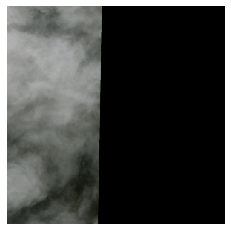

In [157]:
show_sample(ll.train.x[200], ll.train.y[200])

### DataLoader

In [158]:
bs = 8
train_dl, valid_dl = get_dls(ll.train, ll.valid, bs, num_workers=4)

In [159]:
%%time
x, y = next(iter(train_dl))

CPU times: user 16 ms, sys: 44 ms, total: 60 ms
Wall time: 1.09 s


In [160]:
x.shape, y.shape

(torch.Size([8, 3, 512, 512]), torch.Size([8, 1, 512, 512]))

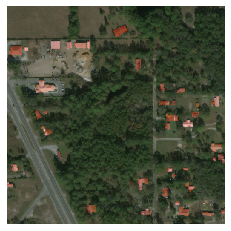

In [161]:
show_sample(x[6], y[6])

### DataBunch

`DataBunch` is primarily a container for the train and valid `DataLoader` objects.  It's the thing that will represent the data in our workflow.

In [162]:
#export
class DataBunch():
    def __init__(self, train_dl, valid_dl): 
        self.train_dl, self.valid_dl = train_dl, valid_dl
        
    @property
    def train_ds(self): return self.train_dl.dataset
    @property
    def valid_ds(self): return self.valid_dl.dataset

In [163]:
#export
def databunchify(sd, bs, **kwargs):
    dls = get_dls(sd.train, sd.valid, bs, **kwargs)
    return DataBunch(*dls)

SplitData.to_databunch = databunchify

Summarise the steps from image file names to `DataBunch`.  This `DataBunch` is to be used for the segmentation of images into binary masks ("building or no building" masks).

In [164]:
fnames = get_files(SOURCE/'train'/'images', extensions=['.png',])
fnames = pre_img_fpaths(fnames)

xtfms = [ResizeFixed(516, resample=PIL.Image.BILINEAR), to_byte_tensor, to_float_tensor, Normalize(1/255)]
il = ImageList(fnames, path=Path('data/train/train/images/'), tfms=xtfms)
sd = SplitData.split_by_random(il, val_pct=.1)
ytfms = [ResizeFixed(516, resample=PIL.Image.NEAREST), to_byte_tensor, to_float_tensor]
ll = label_by_func(sd, img2bmask_fpath, listtype=ImageList, tfms=ytfms)
data = ll.to_databunch(bs, num_workers=4)

In [165]:
x, y = next(iter(data.valid_dl))

In [166]:
bs, x.shape, y.shape, x.dtype, y.dtype

(8,
 torch.Size([16, 3, 516, 516]),
 torch.Size([16, 1, 516, 516]),
 torch.float32,
 torch.float32)

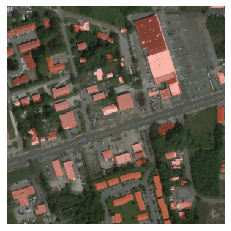

In [167]:
show_sample(x[15], y[15])

In [168]:
x, y = next(iter(data.train_dl))

In [169]:
bs, x.shape, y.shape, x.dtype, y.dtype

(8,
 torch.Size([8, 3, 516, 516]),
 torch.Size([8, 1, 516, 516]),
 torch.float32,
 torch.float32)

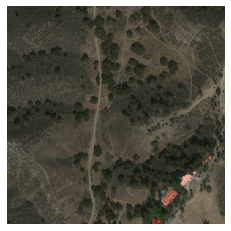

In [170]:
show_sample(x[3], y[3])

### Mask to polygons

The output of the segmentation model will need to be converted to polygons.  This is necessary because, for the test set, neither the pre-disaster or the post-disaster images are provided with polygons of the features.  In order, to carry out damage classification, the polygons of the features are needed, in order to crop the post-disaster image into smalled images that encomapss just one feature.  

The [procedure](https://github.com/DIUx-xView/xview2-baseline/blob/master/spacenet/inference/inference.py#L102) from the competition's baseline model is followed.

In [73]:
import imantics
from pycocotools import mask
from skimage import measure
from simplification.cutil import simplify_coords_vwp

In [176]:
ps = imantics.Mask(polys_mask).polygons()

In [177]:
ps = (p.reshape(-1, 2) for p in ps)

In [178]:
ps = (simplify_coords_vwp(p, .3).astype(np.int32) for p in ps)

In [179]:
ps = np.array([np.concatenate((p, p[0][None,...])) for p in ps])

`ps` is a 1d `np.array` object.  Each element in it represents a polygon.

Check that the polygons obtained make sense by converting them back to a binary mask as before and plotting it.

In [180]:
img_blank = np.zeros((1024, 1024), dtype=np.uint8)
m = cv2.fillPoly(img_blank, ps, (1,))

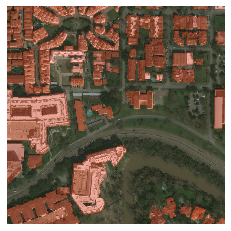

In [181]:
plt.axis('off')
plt.imshow(img)
plt.imshow(np.array([255, 30, 0]) * m[...,None], alpha=.3);

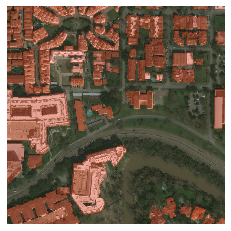

In [183]:
plt.axis('off')
plt.imshow(img)
plt.imshow(np.array([255, 30, 0]) * polys_mask[...,None], alpha=.3);

We started with the mask `polys_mask`, converted it into polygons, then converted these polygons back to a mask, `m`.  Above are plotted `m` and `polys_mask`, and they appear to agree reasonably well.  So, this way of converting a mask into polygons is probably ok.  

It is worth noting that this conversion is not perfect though.  `polys_mask` is a mask that was originally made from the polygons `poly_nas`, which has 177 polygons.  But, using `imantics`, it is converted to only 141 polygons.  So, some features, or buildings, are lost.

In [184]:
len(poly_nas)

177

In [185]:
len(ps)

141

### Damage labels

In [200]:
fn_pre

PosixPath('data/train/train/images/hurricane-harvey_00000015_pre_disaster.png')

In [201]:
fn_post

PosixPath('data/train/train/images/hurricane-harvey_00000015_post_disaster.png')

In [202]:
ln_pre

PosixPath('data/train/train/labels/hurricane-harvey_00000015_pre_disaster.json')

In [203]:
ln_post

PosixPath('data/train/train/labels/hurricane-harvey_00000015_post_disaster.json')

For the same feature, the `uid` is the same in the pre-disaster and post-disaster labels, so `uid` can be used as a feature id.  Pre-disaster and post-disaster `feature_type` are the same.  The `wkt` are close but not identical; the pre-disaster `wkt` will be used as the segmentation label.  

For damage level, it appears to be indicated by `subtype` in the post-disaster labels dictionary, so this will be used as the damage level label.

In [206]:
label_pre['features']['xy'][11]

{'properties': {'feature_type': 'building',
  'uid': '5a3fb1cc-2171-4850-8a01-f162d8e9bfa8'},
 'wkt': 'POLYGON ((807.8469467615187 45.35442169721937, 809.95 46.6, 811.16 84.08, 786.3 84.68000000000001, 785.1275830359681 81.32674759600766, 782.6933654939451 79.43346728554512, 781.3410224150431 72.40128327525568, 782.4228968781646 62.12347587560188, 784.2877438373075 45.47543932944971, 802.7827685534667 40.45755326185315, 807.8469467615187 45.35442169721937))'}

In [207]:
label_post['features']['xy'][11]

{'properties': {'feature_type': 'building',
  'subtype': 'no-damage',
  'uid': '5a3fb1cc-2171-4850-8a01-f162d8e9bfa8'},
 'wkt': 'POLYGON ((807.8469439564834 45.35442310117035, 809.9499971968547 46.6000014048596, 811.159997195312 84.08000140707989, 786.299997194193 84.68000140550743, 785.1275802289359 81.32674899784264, 782.6933626879496 79.43346869169005, 781.3410196095268 72.40128468159683, 782.4228940718413 62.12347727870141, 784.2877410298985 45.47544073386833, 802.7827657485495 40.45755466462002, 807.8469439564834 45.35442310117035))'}

In [208]:
for feat in label_post['features']['xy']:
    print(feat['properties']['uid'])

7ae792ae-64b5-41ec-be7b-14873c450650
4ca98eb5-10bd-4d75-b3b3-3b9012291c1f
22e5eb6a-f924-4b27-9cb0-90b112bcfd66
e2ef0265-66e4-4104-a1a9-3fa985275a1d
e4e531da-2183-440a-9501-66873422625e
a86048e4-04f0-4f8a-b88f-bd0892ac046e
31f3e656-e218-4253-9299-9efad94bd96a
25b9731b-e13b-41fd-960a-5773bc226915
5bffb7c0-8c21-4480-abc6-9ba080f24608
14b4b8e4-f2da-4210-89d2-e0e4d5a51f90
ae46da30-a7ec-4025-81e8-a8d351a18c4d
5a3fb1cc-2171-4850-8a01-f162d8e9bfa8
5a70feab-98aa-4582-b2b0-b380c63ec526
b8659e11-41ea-4836-a4a0-2629c61cc3b6
9c857f80-fda1-4c54-b497-25ae518a8d99
a17d53bc-8ed3-48ff-9667-08d2d0035917
2f495c80-6e45-4787-b1db-dd8c573cd57d
e9538a5a-84f1-43c8-9a1e-987023ba9200
b70af905-95f5-4d0b-8019-ab01a8ba6940
be50deee-333f-4a58-a418-f91c2fe76211
a417b494-1378-4087-a66e-47e16bf16cf8
ca022649-31c7-4549-b48a-361d235a7e2a
737d6bfb-f6b8-402d-9815-8a31a5cdccce
2abdee19-c78b-4b11-a9c6-26cfd074511f
7d2dc8a5-c089-42e2-b943-76fd428df55e
e01b3229-09b1-436c-b198-570796148be6
432598b3-bb09-439a-9cc1-dce15e4b6925
3

# - fin

In [172]:
! python notebook2script.py 01_load_data-GCP.ipynb

Converted 01_load_data-GCP.ipynb to xview2comp/nb_01.py


In [386]:
! pip install -c source-forge 

00_exports-lookntype.ipynb  mask_rank3_uint8_binary.png
01_load_data.ipynb          mask_rank3_uint8_na.png
02_model.ipynb              mask_rank3_uint8_na_pil.png
README.md                   notebook2script.py
data                        run_notebook.py
exp                         testsave_bigfactory.png
mask_rank2_uint8_na.png     xview2comp
mask_rank2_uint8_na_pil.png
